# <center> **CIFAR-10 Manifold Learning Comparison** </center>
<br><br>

### <center> Author: Omar Gabr </center>

# **What is the Objective of this Project?**

This project aims to compare different manifold learning algorithms on the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which consists of 60,000 color images of size 32x32x3 divided into 10 classes. Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. The goal is to project the data into 2D using various manifold learning algorithms, and color the data by the class in which it belongs.

The manifold learning algorithms to be used include
1. Principle Component Analysis
2. Isomap Embedding
3. Locally Linear Embedding
4. Multi-Dimensional Scaling
5. Spectral Embedding
6. T-distributed Stochastic Neighbor Embedding

Additionally, the UMAP algorithm will also be used. All these algorithms are available in the sklearn and keras library.

# **Why Was this Dataset Chosen?**

The CIFAR-10 dataset was chosen because it provides a challenging image classification problem with a large number of classes and color images. This dataset is different from the MNIST dataset in that it contains 10 classes of color images with a size of 32x32x3, which makes it a more realistic representation of real-world image data.

The goal of this project is to evaluate the performance of different manifold learning algorithms on this dataset and compare their ability to capture the underlying structure of the data while preserving class information.

This analysis will provide insights into which algorithm is better suited for this type of dataset and potentially improve the performance of image classification tasks.

# **Train Test Split**

### Importing Dataset into Training and Testing Sets

In [1]:
from keras.datasets import cifar10
import numpy as np

# split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# verify that training and testing sets have appropriate sizes
print(f"Training Set Shapes: ({X_train.shape}, {y_train.shape})")
print(f"Testing Set Shapes: ({X_test.shape}, {y_test.shape})\n")

# Set the desired sizes for X_train and X_test
train_size = 16000
test_size = 4000

# Use np.random.permutation to shuffle the indices of the data
idx_train = np.random.permutation(X_train.shape[0])
idx_test = np.random.permutation(X_test.shape[0])

# Use the shuffled indices to create the subsampled training and testing sets
X_train_samp = X_train[idx_train[:train_size]]
y_train_samp = y_train[idx_train[:train_size]].reshape(-1)
X_test_samp = X_test[idx_test[:test_size]]
y_test_samp = y_test[idx_test[:test_size]].reshape(-1)

# Verify the shapes of the subsampled data
print(f"Subsampled Training Sets: ({X_train_samp.shape}, {X_test_samp.shape})")
print(f"Subsampled Testing Sets: ({X_test_samp.shape}, {y_test_samp.shape})")

Training Set Shapes: ((50000, 32, 32, 3), (50000, 1))
Testing Set Shapes: ((10000, 32, 32, 3), (10000, 1))

Subsampled Training Sets: ((16000, 32, 32, 3), (4000, 32, 32, 3))
Subsampled Testing Sets: ((4000, 32, 32, 3), (4000,))


# **Manifold Learning Algorithms**

### Defining a Data-Fitting Function for Manifold Learning Algorithms

Ensuring the same scale is used over all features, because manifold learning methods are based on a nearest-neighbor search.

In [2]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from umap import UMAP
import matplotlib.pyplot as plt

# 3 inputs: 1) x_train, 2) x_test, 3) ml model
def manifold_learning_fit(X_train, X_test, manifold_model):
  
    # Apply preprocessing to reduce dimensionality
    if manifold_model in ['pca', 'isomap', 'lle', 'mds', 'spectral']:
        # Use UMAP to preprocess the data before applying the desired manifold learning algorithm
        reducer = UMAP(n_components=2)
        X_train = reducer.fit_transform(X_train.reshape(X_train.shape[0], -1))
        X_test = reducer.transform(X_test.reshape(X_test.shape[0], -1))

    # Conditional statements based on manifold_model input
    if manifold_model == 'pca':
        model = PCA()
        X_train_transform = model.fit_transform(X_train)
        X_test_transform = model.transform(X_test)
        
    elif manifold_model in ['isomap', 'lle', 'mds', 'spectral']:
        model = globals()[manifold_model.capitalize()]()
        X_train_transform = model.fit_transform(X_train)
        X_test_transform = model.transform(X_test)
        
    elif manifold_model == 'tsne':
        model = TSNE()
        X_train_transform = model.fit_transform(X_train)
        X_test_transform = model.transform(X_test)
        
    return X_train_transform, X_test_transform

### <center> Principal Component Analysis (PCA) </center>

PCA is the main linear algorithm for dimension reduction often used in unsupervised learning. It is a linear dimensionality reduction technique using singular value decomposition of the data to project it to a lower dimensional space. The input data is centered, but not scaled, for each feature before applying the SVD.

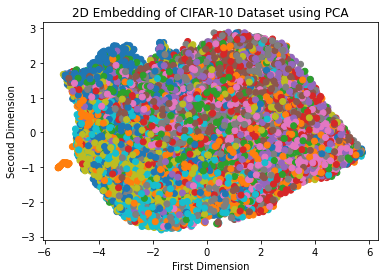

In [18]:
import matplotlib.pyplot as plt

pca_train, pca_test = manifold_learning_fit(X_train_samp, X_test_samp, 'pca')

# Plot the 2D embeddings for the PCA model
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y_train_samp.flatten(), cmap='tab10')
plt.title('2D Embedding of CIFAR-10 Dataset using PCA')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.show()

### <center> Isomap Embedding </center>

Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points. Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA.

In [ ]:
# Fit the Isomap model and obtain the 2D embeddings
X_train_isomap, X_test_isomap = manifold_learning_fit(X_train_samp, X_test_samp, 'isomap')

# Plot the 2D embeddings for the Isomap model
plt.scatter(X_train_isomap[:, 0], X_train_isomap[:, 1], c=y_train_samp.flatten(), cmap='tab10')
plt.title('2D Embedding of CIFAR-10 Dataset using Isomap')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


### <center> Locally Linear Embedding (LLE) </center>

LLE seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

### <center> Multi-Dimensional Scaling (MDS) </center>

MDS seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space. It is a technique used for analyzing similarity or dissimilarity data. It attempts to model such data as distances in a geometric spaces.

ValueError: ignored

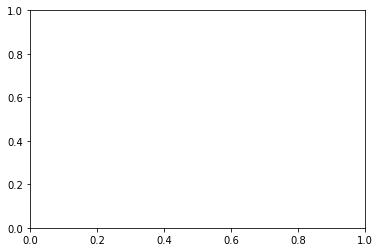

In [8]:
# Reshape the data to the original image shape for plotting
X_train_mds = X_train_samp.reshape(X_train_samp.shape[0], -1, 2)
X_test_mds = X_test_samp.reshape(X_test_samp.shape[0], -1, 2)

# Plot the 2D embeddings for the MDS model
plt.scatter(X_train_mds[:, :, 0].flatten(), X_train_mds[:, :, 1].flatten(), c=y_train_samp.flatten(), cmap='tab10')
plt.title('2D Embedding of CIFAR-10 Dataset using MDS')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.show()

### <center> Spectral Embedding </center>

Spectral Embedding is an approach to calculating a non-linear embedding. This method aims to find a simplified version of the data by using a mathematical technique called spectral decomposition of the graph Laplacian. This creates a graph that approximates the data's structure in a lower dimension.


### <center> t-distributed Stochastic Neighbor Embedding (t-SNE) </center>

t-SNE is a technique that helps visualize high-dimensional data by creating a low-dimensional representation. It works by converting the relationships between data points in the high-dimensional space into probabilities.

In the original space, the relationships are depicted using Gaussian joint probabilities, while in the embedded space, they are illustrated using Student's t-distributions.


# **Comparison Evaluation**

# **Conclusion**